In [1]:
# !pip install pyspark==3.1.1 py4j==0.10.9 
from pyspark.sql import SparkSession
import numpy as np

In [4]:
#create instance of spark class 
spark=SparkSession.builder.appName('Questions').getOrCreate()

In [5]:
spark

In [6]:
emp = spark.read.csv('employee.csv',header='true', 
                      inferSchema='true')
emp.show(5)

+-----------+----------+---------+--------------------+------------+----------+------+-------+----------+-------------+
|employee_id|first_name|last_name|               email|phone_number| hire_date|job_id| salary|manager_id|department_id|
+-----------+----------+---------+--------------------+------------+----------+------+-------+----------+-------------+
|        100|    Steven|     King|steven.king@sqltu...|515.123.4567|1987-06-17|     4|24000.0|      null|            9|
|        101|     Neena|  Kochhar|neena.kochhar@sql...|515.123.4568|1989-09-21|     5|17000.0|     100.0|            9|
|        102|       Lex|   DeHaan|lex.dehaan@sqltut...|515.123.4569|1993-01-13|     5|17000.0|     100.0|            9|
|        103| Alexander|   Hunold|alexander.hunold@...|590.423.4567|1990-01-03|     9| 9000.0|     102.0|            6|
|        104|     Bruce|    Ernst|bruce.ernst@sqltu...|590.423.4568|1991-05-21|     9| 6000.0|     103.0|            6|
+-----------+----------+---------+------

In [20]:
dept = spark.read.csv('department.csv',header='true', 
                      inferSchema='true')
dept.show(5)

+-------------+---------------+-----------+
|department_id|department_name|location_id|
+-------------+---------------+-----------+
|            1| Administration|       1700|
|            2|      Marketing|       1800|
|            3|     Purchasing|       1700|
|            4|Human Resources|       2400|
|            5|       Shipping|       1500|
+-------------+---------------+-----------+
only showing top 5 rows



In [21]:
location = spark.read.csv('location.csv',header='true', 
                      inferSchema='true')
location.show(5)

+-----------+-------------------+-----------+-------------------+--------------+----------+
|location_id|     street_address|postal_code|               city|state_province|country_id|
+-----------+-------------------+-----------+-------------------+--------------+----------+
|       1400|2014 Jabberwocky Rd|      26192|          Southlake|         Texas|        US|
|       1500|2011 Interiors Blvd|      99236|South San Francisco|    California|        US|
|       1700|    2004 Charade Rd|      98199|            Seattle|    Washington|        US|
|       1800|    147 Spadina Ave|    M5V 2L7|            Toronto|       Ontario|        CA|
|       2400|     8204 Arthur St|       null|             London|          null|        UK|
+-----------+-------------------+-----------+-------------------+--------------+----------+
only showing top 5 rows



In [22]:
countries = spark.read.csv('country.csv',header='true', 
                      inferSchema='true')
countries.show(5)

+----------+------------+---------+
|country_id|country_name|region_id|
+----------+------------+---------+
|        AR|   Argentina|        2|
|        AU|   Australia|        3|
|        BE|     Belgium|        1|
|        BR|      Brazil|        2|
|        CA|      Canada|        2|
+----------+------------+---------+
only showing top 5 rows



**1. Get list of employess along with their department details**

In [23]:
emp_dept =  emp.join(dept,emp["department_id"] ==  dept["department_id"],"left")
emp_dept.show(5)

+-----------+----------+---------+--------------------+------------+----------+------+-------+----------+-------------+-------------+---------------+-----------+
|employee_id|first_name|last_name|               email|phone_number| hire_date|job_id| salary|manager_id|department_id|department_id|department_name|location_id|
+-----------+----------+---------+--------------------+------------+----------+------+-------+----------+-------------+-------------+---------------+-----------+
|        100|    Steven|     King|steven.king@sqltu...|515.123.4567|1987-06-17|     4|24000.0|      null|            9|            9|      Executive|       1700|
|        101|     Neena|  Kochhar|neena.kochhar@sql...|515.123.4568|1989-09-21|     5|17000.0|     100.0|            9|            9|      Executive|       1700|
|        102|       Lex|   DeHaan|lex.dehaan@sqltut...|515.123.4569|1993-01-13|     5|17000.0|     100.0|            9|            9|      Executive|       1700|
|        103| Alexander|   H

**2. Analysis Employee Department**

In [24]:
from pyspark.sql import functions as f

In [25]:
emp_dept.groupBy('department_name').agg(f.sum('salary').alias('total salary'),
                                       f.count('location_id').alias('location count'),
                                       f.countDistinct('job_id').alias('unique job id count')).show()

+----------------+------------+--------------+-------------------+
| department_name|total salary|location count|unique job id count|
+----------------+------------+--------------+-------------------+
|           Sales|     57700.0|             6|                  2|
|      Accounting|     20300.0|             2|                  2|
|         Finance|     51600.0|             6|                  2|
|Public Relations|     10000.0|             1|                  1|
|       Executive|     58000.0|             3|                  2|
|      Purchasing|     24900.0|             6|                  2|
|       Marketing|     19000.0|             2|                  2|
|              IT|     28800.0|             5|                  1|
|  Administration|      4400.0|             1|                  1|
|        Shipping|     41200.0|             7|                  3|
| Human Resources|      6500.0|             1|                  1|
+----------------+------------+--------------+----------------

In [26]:
emp_dept.groupBy('department_name').count().show()

+----------------+-----+
| department_name|count|
+----------------+-----+
|           Sales|    6|
|      Accounting|    2|
|         Finance|    6|
|Public Relations|    1|
|       Executive|    3|
|      Purchasing|    6|
|       Marketing|    2|
|              IT|    5|
|  Administration|    1|
|        Shipping|    7|
| Human Resources|    1|
+----------------+-----+



In [27]:
department_count = emp_dept.select('department_name').toPandas()
department_count.head()

,department_name
0,Executive
1,Executive
2,Executive
3,IT
4,IT


In [28]:
a1=emp_dept.filter(f.col('job_id')==5).toPandas()
a1

,employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id,department_id,department_name,location_id
0,101,Neena,Kochhar,neena.kochhar@sqltutorial.org,515.123.4568,1989-09-21,5,17000.0,100.0,9,9,Executive,1700
1,102,Lex,DeHaan,lex.dehaan@sqltutorial.org,515.123.4569,1993-01-13,5,17000.0,100.0,9,9,Executive,1700


In [29]:
type(emp_dept)

pyspark.sql.dataframe.DataFrame

In [30]:
emp_dept.columns

['employee_id',
 'first_name',
 'last_name',
 'email',
 'phone_number',
 'hire_date',
 'job_id',
 'salary',
 'manager_id',
 'department_id',
 'department_id',
 'department_name',
 'location_id']

In [29]:
emp_dept.select(f.col('department_name'), f.col('job_id')).show(5)

+---------------+------------+
|department_name|(job_id = 4)|
+---------------+------------+
|      Executive|        true|
|      Executive|       false|
|      Executive|       false|
|             IT|       false|
|             IT|       false|
+---------------+------------+
only showing top 5 rows



In [48]:
k1 = emp_dept.groupby('department_name').agg(f.count('department_name').alias('department_count')).toPandas()

In [49]:
k1

,department_name,department_count
0,Sales,6
1,Accounting,2
2,Finance,6
3,Public Relations,1
4,Executive,3
5,Purchasing,6
6,Marketing,2
7,IT,5
8,Administration,1
9,Shipping,7


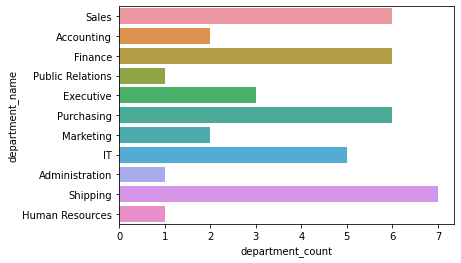

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(y='department_name',x='department_count',data=k1)
plt.show()

**Conclusion**

* Majority of employess(around 17.5%) work in Shipping Department
* Administration, Human Resources and Public Relations are Departments having least number of Employees working
* Finance, Sales and Purchasing departments have equal percentage of employees employeed 

**3. Get Address of Administration and Marketing Department**

In [31]:
department_locations = dept.join(location,dept["location_id"] ==  location["location_id"],"left")

In [32]:
countries_department_locations = department_locations.join(countries,department_locations["country_id"] ==  countries["country_id"],"left")
countries_department_locations.show(1)

+-------------+---------------+-----------+-----------+---------------+-----------+-------+--------------+----------+----------+--------------------+---------+
|department_id|department_name|location_id|location_id| street_address|postal_code|   city|state_province|country_id|country_id|        country_name|region_id|
+-------------+---------------+-----------+-----------+---------------+-----------+-------+--------------+----------+----------+--------------------+---------+
|            1| Administration|       1700|       1700|2004 Charade Rd|      98199|Seattle|    Washington|        US|        US|United States of ...|        2|
+-------------+---------------+-----------+-----------+---------------+-----------+-------+--------------+----------+----------+--------------------+---------+
only showing top 1 row



**4. Get Employees who work in USA as Administration department**

In [33]:
employees_department_locations = emp.join(countries_department_locations,emp["department_id"] ==  countries_department_locations["department_id"],"left")
employees_department_locations.show(1)

+-----------+----------+---------+--------------------+------------+----------+------+------+----------+-------------+-------------+---------------+-----------+-----------+---------------+-----------+-------+--------------+----------+----------+--------------------+---------+
|employee_id|first_name|last_name|               email|phone_number| hire_date|job_id|salary|manager_id|department_id|department_id|department_name|location_id|location_id| street_address|postal_code|   city|state_province|country_id|country_id|        country_name|region_id|
+-----------+----------+---------+--------------------+------------+----------+------+------+----------+-------------+-------------+---------------+-----------+-----------+---------------+-----------+-------+--------------+----------+----------+--------------------+---------+
|        200|  Jennifer|   Whalen|jennifer.whalen@s...|515.123.4444|1987-09-17|     3|4400.0|     101.0|            1|            1| Administration|       1700|       17

**5. How many employees work in Canada ?**

In [ ]:
employees_department_locations.collect()

[Row(employee_id=200, first_name='Jennifer', last_name='Whalen', email='jennifer.whalen@sqltutorial.org', phone_number='515.123.4444', hire_date='1987-09-17', job_id=3, salary=4400.0, manager_id=101.0, department_id=1, department_id=1, department_name='Administration', location_id=1700, location_id=1700, street_address='2004 Charade Rd', postal_code='98199', city='Seattle', state_province='Washington', country_id='US', country_id='US', country_name='United States of America', region_id=2),
 Row(employee_id=103, first_name='Alexander', last_name='Hunold', email='alexander.hunold@sqltutorial.org', phone_number='590.423.4567', hire_date='1990-01-03', job_id=9, salary=9000.0, manager_id=102.0, department_id=6, department_id=6, department_name='IT', location_id=1400, location_id=1400, street_address='2014 Jabberwocky Rd', postal_code='26192', city='Southlake', state_province='Texas', country_id='US', country_id='US', country_name='United States of America', region_id=2),
 Row(employee_id=10

In [ ]:
employees_department_locations.groupBy('country_name').count().show()


+--------------------+-----+
|        country_name|count|
+--------------------+-----+
|             Germany|    1|
|United States of ...|   30|
|              Canada|    2|
|      United Kingdom|    7|
+--------------------+-----+



**Only two people works in canada**

**6. Get Complete Address of Employees**

In [ ]:
employees_department_locations.printSchema()

root
 |-- employee_id: integer (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- email: string (nullable = true)
 |-- phone_number: string (nullable = true)
 |-- hire_date: string (nullable = true)
 |-- job_id: integer (nullable = true)
 |-- salary: double (nullable = true)
 |-- manager_id: double (nullable = true)
 |-- department_id: integer (nullable = true)
 |-- department_id: integer (nullable = true)
 |-- department_name: string (nullable = true)
 |-- location_id: integer (nullable = true)
 |-- location_id: integer (nullable = true)
 |-- street_address: string (nullable = true)
 |-- postal_code: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state_province: string (nullable = true)
 |-- country_id: string (nullable = true)
 |-- country_id: string (nullable = true)
 |-- country_name: string (nullable = true)
 |-- region_id: integer (nullable = true)



In [ ]:
from pyspark.sql.functions import concat , col , lit
import pandas as pd
# pd.set_option('display.width', 50000)

h=employees_department_locations.withColumn("Address",
                                          concat(col("street_address"), lit(","),
                                          col("city"), lit(","),
                                          col("postal_code"), lit(","),
                                          col("state_province") , lit(","), 
                                          col("country_name"))).select('Address').toPandas()
h

**7. Convert Employee's First name and last name to lower case letters and concatinate them**

In [67]:
def convertCase(string):
    return string.lower()

In [68]:
from pyspark.sql.functions import udf , StringType
convertUDF = udf(lambda z: convertCase(z),StringType())

In [70]:
emp.select(convertUDF(col("first_name")).alias("first_name"), convertUDF(col("last_name")).alias("last_name")).withColumn("Name",
                                                                                                                           concat(col("first_name"), lit(" "),
                                                                                                                                  col("last_name"))).select('Name').show()

+----------------+
|            Name|
+----------------+
|     steven king|
|   neena kochhar|
|      lex dehaan|
|alexander hunold|
|     bruce ernst|
|    david austin|
| valli pataballa|
|   diana lorentz|
| nancy greenberg|
|   daniel faviet|
|       john chen|
|  ismael sciarra|
|josemanuel urman|
|       luis popp|
|    den raphaely|
|  alexander khoo|
|    shelli baida|
|    sigal tobias|
|      guy himuro|
|karen colmenares|
+----------------+
only showing top 20 rows



**8. Get Hightest paid jobs**

In [73]:
int(employees_department_locations.select(max('salary')).collect()[0][0])

24000

In [36]:
from pyspark.sql import functions as f
p2 = employees_department_locations.select('salary').agg(f.percentile_approx('salary',[0.5, 0.7, 0.9,0.99]).alias('percentiles')).toPandas()
p2

,percentiles
0,"[7700.0, 8600.0, 13500.0, 24000.0]"


In [37]:
p2['percentiles'].explode()

0     7700
0     8600
0    13500
0    24000
Name: percentiles, dtype: object

In [39]:
data = employees_department_locations.select('*')

In [40]:
data

DataFrame[employee_id: int, first_name: string, last_name: string, email: string, phone_number: string, hire_date: string, job_id: int, salary: double, manager_id: double, department_id: int, department_id: int, department_name: string, location_id: int, location_id: int, street_address: string, postal_code: string, city: string, state_province: string, country_id: string, country_id: string, country_name: string, region_id: int]

In [44]:
from pyspark.sql import SQLContext
data.registerTempTable("data")
sql_context = SQLContext(spark)
sql_context.sql(f"SELECT department_name from data WHERE salary == {employees_department_locations.select(max('salary'))".collect()[0][0]}).collect()[0][0]

AnalysisException: ignored

Hightest paid job is Executive